In [235]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display
df = pd.read_csv('dataset/survey_results_public.csv', sep=',')
display(df.info())
display(df.describe())


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/survey_results_public.csv'

In [ ]:
columns=['Hobby','OpenSource','Country','Employment',\
    'FormalEducation','UndergradMajor','JobSatisfaction','ConvertedSalary']

data=df.get(columns).dropna()
data.head()


,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction,ConvertedSalary
1,Yes,Yes,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Moderately dissatisfied,70841.0
4,Yes,No,South Africa,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,21426.0
5,Yes,No,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Moderately satisfied,41671.0
6,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,120000.0
8,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Moderately satisfied,250000.0


In [ ]:
js_dict = {
    'Extremely dissatisfied':0,
    'Moderately dissatisfied':1,
    'Slightly dissatisfied':2,
    'Neither satisfied nor dissatisfied':3,
    'Slightly satisfied':4,
    'Moderately satisfied':5,
    'Extremely satisfied':6,
}

data['JobSatisfaction']=data['JobSatisfaction'].map(js_dict)

In [ ]:
data = data.replace('Bachelor’s degree (BA, BS, B.Eng., etc.)',"Bachelor")
data = data.replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)',"Master")
data = data.replace('Other doctoral degree (Ph.D, Ed.D., etc.)',"Ph.D")
data = data[data['FormalEducation'].isin(['Bachelor','Master','Ph.D'])]

In [ ]:
countries=data.groupby('Country').size().sort_values()[-3:].index.tolist()
data = data[data['Country'].isin(countries)]

Country  Employment  FormalEducation  \
ConvertedSalary   JobSatisfaction                                         
0-250.000         0                    494         494              494   
                  1                   1371        1371             1371   
                  2                   1547        1547             1547   
                  3                    858         858              858   
                  4                   2014        2014             2014   
                  5                   5587        5587             5587   
                  6                   2976        2976             2976   
1.000.000+        0                     14          14               14   
                  1                     30          30               30   
                  2                     24          24               24   
                  3                     19          19               19   
                  4                     32          32               32   
                  5                     96          96               96   
                  6                     68          68               68   
250.000-1.000.000 0                     18          18               18   
                  1                     60          60               60   
                  2                     53          53               53   
                  3                     29          29               29   
                  4                     51          51               51   
                  5                    190         190              190   
                  6                    128         128              128   

                                   Hobby  OpenSource  UndergradMajor  
ConvertedSalary   JobSatisfaction                                     
0-250.000         0                  494         494             494  
                  1                 1371        1371            1371  
                  2                 1547        1547            1547  
                  3                  858         858             858  
                  4                 2014        2014            2014  
                  5                 5587        5587            5587  
                  6                 2976        2976            2976  
1.000.000+        0                   14          14              14  
                  1                   30          30              30  
                  2                   24          24              24  
                  3                   19          19              19  
                  4                   32          32              32  
                  5                   96          96              96  
                  6                   68          68              68  
250.000-1.000.000 0                   18          18              18  
                  1                   60          60              60  
                  2                   53          53              53  
                  3                   29          29              29  
                  4                   51          51              51  
                  5                  190         190             190  
                  6                  128         128             128

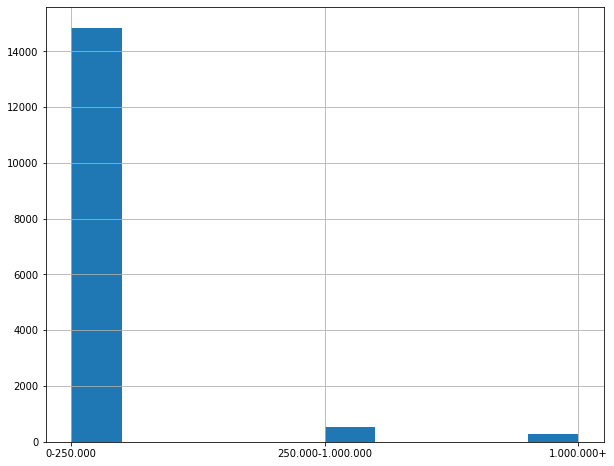

In [ ]:
plt.figure(figsize=(10,8))
data.ConvertedSalary=data.ConvertedSalary.map(lambda x: '0-250.000' if x<=250000 else '250.000-1.000.000' if x<=1000000 else '1.000.000+')
data.ConvertedSalary.hist()
pd.pivot_table(data,index=['ConvertedSalary','JobSatisfaction'],aggfunc='count')


In [ ]:
stem=['A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Web development or web design',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 'Mathematics or statistics',
 'Information systems, information technology, or system administration',
]

not_stem=[ 'A social science (ex. anthropology, psychology, political science)',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A business discipline (ex. accounting, finance, marketing)',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'A health science (ex. nursing, pharmacy, radiology)',
]

data=data[data['UndergradMajor'].isin(stem+not_stem)]
data.UndergradMajor=data.UndergradMajor.map(lambda x: 'STEM' if x in stem else 'NOT_STEM')
#'I never declared a major' WHERE DO THEY GO? 

#Just Delete them <------


In [ ]:
display(data.head())
for col in data.columns: 
    print(col,data[col].unique())

,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction,ConvertedSalary
1,Yes,Yes,United Kingdom,Employed full-time,Bachelor,STEM,1,0-250.000
5,Yes,No,United Kingdom,Employed full-time,Bachelor,STEM,5,0-250.000
22,No,No,United Kingdom,Employed full-time,Bachelor,STEM,4,0-250.000
24,Yes,No,India,Employed full-time,Master,STEM,5,0-250.000
27,No,No,United States,Employed full-time,Bachelor,NOT_STEM,5,250.000-1.000.000


Hobby ['Yes' 'No']
OpenSource ['Yes' 'No']
Country ['United Kingdom' 'India' 'United States']
Employment ['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
FormalEducation ['Bachelor' 'Master' 'Ph.D']
UndergradMajor ['STEM' 'NOT_STEM']
JobSatisfaction [1 5 4 0 6 2 3]
ConvertedSalary ['0-250.000' '250.000-1.000.000' '1.000.000+']


In [ ]:
def chi2_contingency_mat(data,alpha=None):
    s=data.columns.size
    a = 0
    b = 0
    mat=np.zeros((s,s))
    for i in data.columns:
        for j in data.columns:
            contigency_pct = pd.crosstab(data[i], data[j])
            c, p, dof, expected = chi2_contingency(contigency_pct)
            mat[a][b]=p
            b=b+1
        a = a+1
        b=0
    if alpha:
        mat[mat>=alpha]=1
        mat[mat<alpha]=0
    return mat

def chi2_contingency_dict(data,alpha=None):
    s=data.columns.size
    a = 0
    b = 0
    mat={}
    for i in data.columns:
        mat[i] = {}

    
    for i in data.columns:
        for j in data.columns:
            contigency_pct = pd.crosstab(data[i], data[j])
            c, p, dof, expected = chi2_contingency(contigency_pct)
            mat[i][j]=p
    # if alpha:
    #     mat[mat>=alpha]=1
    #     mat[mat<alpha]=0
    return mat

In [ ]:
list(data.columns)

['Hobby',
 'OpenSource',
 'Country',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'JobSatisfaction',
 'ConvertedSalary']

<AxesSubplot:>

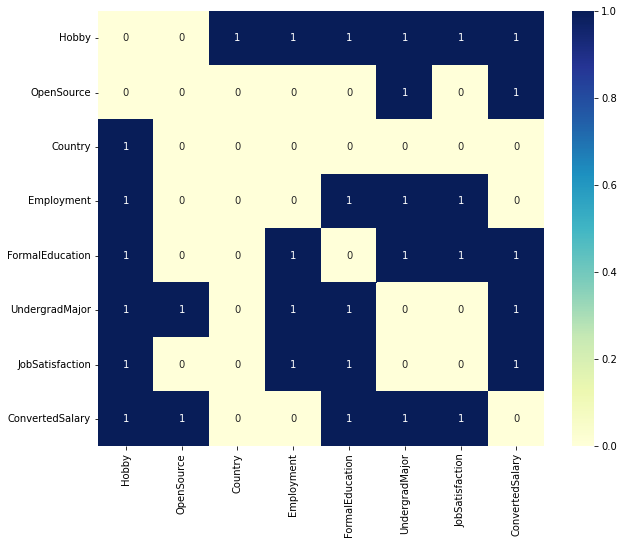

In [ ]:
chi2Mat=chi2_contingency_mat(data,5e-7)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

In [ ]:
chi2Mat=chi2_contingency_dict(data,5e-7)
plt.figure(figsize=(10,8))
# sns.heatmap(chi2Mat,annot=True)
print(chi2Mat)

{'Hobby': {'Hobby': 0.0, 'OpenSource': 2.0207816600405517e-198, 'Country': 0.023885264586311104, 'Employment': 0.01821537035979789, 'FormalEducation': 0.8724641082856956, 'UndergradMajor': 0.7441049394290169, 'JobSatisfaction': 0.0396076560016856, 'ConvertedSalary': 0.1486167034658401}, 'OpenSource': {'Hobby': 2.020781660040436e-198, 'OpenSource': 0.0, 'Country': 8.826624345273436e-09, 'Employment': 3.3764607070284688e-12, 'FormalEducation': 8.254476772594315e-08, 'UndergradMajor': 0.2359921881801427, 'JobSatisfaction': 1.534686819498018e-10, 'ConvertedSalary': 0.3767594760597688}, 'Country': {'Hobby': 0.023885264586311104, 'OpenSource': 8.826624345273436e-09, 'Country': 0.0, 'Employment': 7.879295869012344e-28, 'FormalEducation': 4.4340944475916313e-60, 'UndergradMajor': 6.503441933170004e-122, 'JobSatisfaction': 8.020207050098856e-98, 'ConvertedSalary': 2.883015183361584e-139}, 'Employment': {'Hobby': 0.01821537035979789, 'OpenSource': 3.3764607070284688e-12, 'Country': 7.87929586901

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

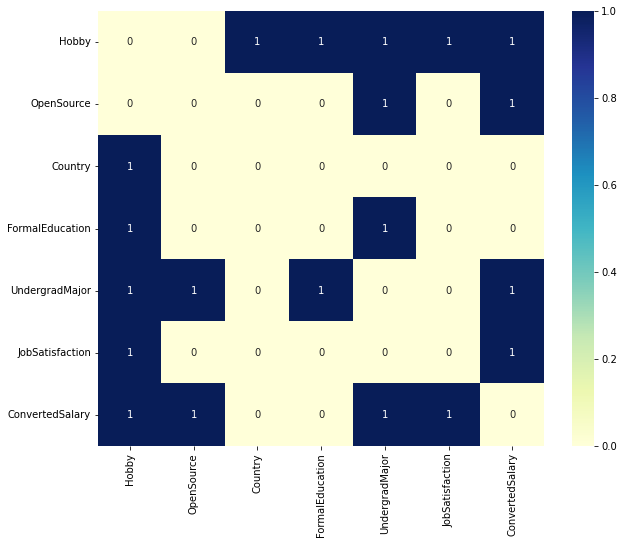

In [ ]:
data = data.drop('Employment', axis=1)
chi2Mat=chi2_contingency_mat(data,5e-3)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

In [ ]:
def compute_graph_table(data, chi2Mat):

    graph_table = pd.DataFrame()


    source = []
    target=[]

    a=1
    for i in range(data.columns.size):
        for j in range(a, data.columns.size):
            if chi2Mat[i][j]==0:
                source.append(data.columns[i])
                target.append(data.columns[j])
        a=a+1

    type=['Unidirected' for i in range(len(source))]
    weight=[None for i in range(len(source))]
    graph_table['Source']=source
    graph_table['Target']=target
    graph_table['Type']=type
    graph_table['weight']=weight
    return graph_table


In [ ]:
graph_table = compute_graph_table(data, chi2Mat)
graph_table

,Source,Target,Type,weight
0,Hobby,OpenSource,Unidirected,None
1,OpenSource,Country,Unidirected,None
2,OpenSource,FormalEducation,Unidirected,None
3,OpenSource,JobSatisfaction,Unidirected,None
4,Country,FormalEducation,Unidirected,None
5,Country,UndergradMajor,Unidirected,None
6,Country,JobSatisfaction,Unidirected,None
7,Country,ConvertedSalary,Unidirected,None
8,FormalEducation,JobSatisfaction,Unidirected,None
9,FormalEducation,ConvertedSalary,Unidirected,None


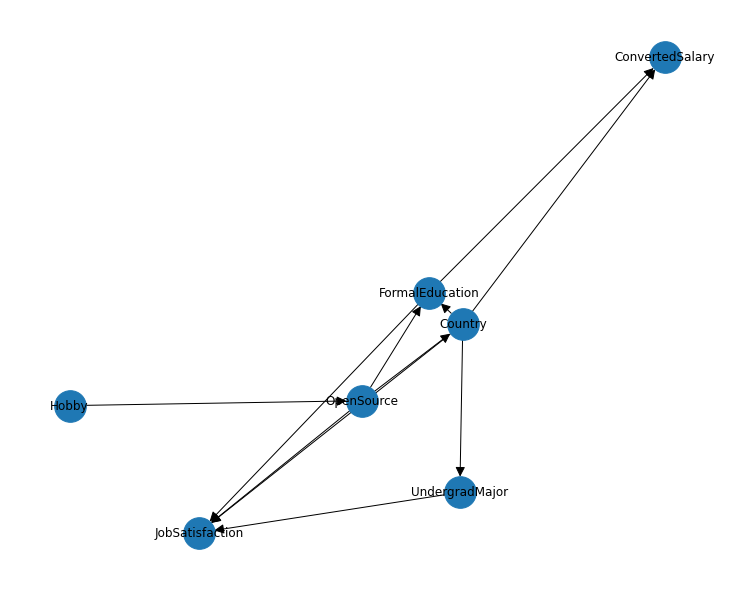

In [247]:
import networkx as nx
from pyvis.network import Network

G = nx.from_pandas_edgelist(graph_table, source='Source', target='Target',create_using=nx.DiGraph())
# net = Network(notebook=True, directed=True)
# net.from_nx(G)
# net.show('nx.html')
pos={'Hobby':(0.5,10)
     'JobSatisfaction':(4,0.5)
 }
plt.figure(figsize=(10,8))
nx.draw(G, arrows=True, with_labels=True, node_size=1000, arrowsize=20, pos=pos )
# print(G.edges())